## Wrangling the Billboard Top 100

In [61]:
# Inital set up
import pandas as pd
import matplotlib.pyplot as plt

### Part A: 
    
> Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

> Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

> (Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [3]:
# Load dataset and combine the columns for Year and Week
df_billboard = pd.read_csv('billboard.csv')
df_billboard['year_week'] = df_billboard['year'].astype(str) + '-' + df_billboard['week'].astype(str)

The table below captures the essence of the top 10 most popular songs since 1958, meticulously curated based on their enduring impact and the total number of weeks they graced the esteemed Billboard Top 100 chart. Comprising a blend of genres and artists, the table encapsulates the musical journey of these songs that have left an indelible mark on the cultural fabric.

In [7]:
# Count number of weeks by song and performer
df_billboard_top = df_billboard.groupby(['song', 'performer'])['year_week'].nunique().reset_index().rename(columns={'year_week':'count'})

# select top 10 songs
print("Here is a table of the top 10 most popular songs since 1958 measured by number of weeks in Billboard Top 100.")
df_billboard_top.sort_values(by='count', ascending=False)[:10].reset_index(drop=True)

Here is a table of the top 10 most popular songs since 1958 measured by number of weeks in Billboard Top 100.


,song,performer,count
0,Radioactive,Imagine Dragons,87
1,Sail,AWOLNATION,79
2,Blinding Lights,The Weeknd,76
3,I'm Yours,Jason Mraz,76
4,How Do I Live,LeAnn Rimes,69
5,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
6,Counting Stars,OneRepublic,68
7,Rolling In The Deep,Adele,65
8,Foolish Games/You Were Meant For Me,Jewel,65
9,Before He Cheats,Carrie Underwood,64


### Part B: 
> Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

> There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

In [10]:
# Filter out years 1958 and 2021
df_billboard_filters = df_billboard[~df_billboard['year'].isin([1958,2021])]

In [30]:
# Count number of unique songs for each year
df_musical_diversity = df_billboard_filters.groupby('year')['song_id'].agg(count='nunique').reset_index()
df_musical_diversity.head(5)

,year,count
0,1959,663
1,1960,700
2,1961,779
3,1962,768
4,1963,754


The line chart below illustrates the evolution of "Musical Diversity" from 1959 to 2020, as measured by the number of unique songs released in each specific year. The trend showcases distinct phases of change, marked by periods of decline, recovery, and remarkable resurgence.

Some insights on the trend:

- In the early years, from 1959 to the late 1960s, the musical landscape was characterized by a diverse array of songs, reflecting a dynamic and experimental era in music production.

- The chart indicates a noticeable decline in musical diversity starting around 1968, persisting through the end of the 20th century. 

- A brief period of recovery in the early 2000s is evident, indicating a renewed interest in experimenting with diverse musical styles.

- A remarkable and sustained increase in musical diversity is observable from around 2004 to 2011. This period could be associated with the rapid growth of the internet, streaming services, and social media, enabling artists from various backgrounds to gain visibility and reach a global audience.

- The last phase is from 2014 to 2020. The trend highlights a somewhat plateaued diversity after the substantial increase observed in the previous decade.

In summary, the trend of "Musical Diversity" over time reflects the dynamic interplay between technological advancements, industry shifts, and cultural influences. 

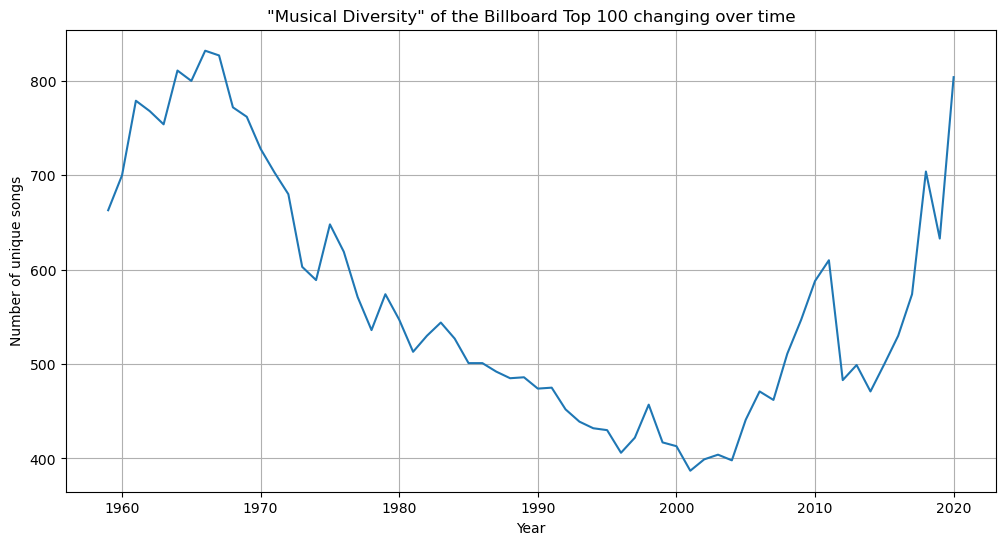

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_musical_diversity['year'], df_musical_diversity['count'])

ax.set_xlabel('Year')
ax.set_ylabel('Number of unique songs')
ax.set_title('"Musical Diversity" of the Billboard Top 100 changing over time')
ax.grid()
plt.show()

### Part C
>Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

>Notes: 
> - You might find this easier to accomplish in two distinct sets of data wrangling steps.
> - Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.
> - By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the fct_reorder function, described in this blog post. This is optional.

In [55]:
# Count the number of ten week hit songs for each artist 
df_ten_week_hit = df_billboard[df_billboard['song_id'].isin(ten_week_hit_list)]
df_ten_week_hit_performer = df_ten_week_hit.groupby('performer')['song_id'].agg(count='nunique').reset_index()

# Find the 19 artists with at least 30 ten week hit songs, sort by number of ten week hit songs from high to low
df_ten_week_hit_performer_30 = df_ten_week_hit_performer[df_ten_week_hit_performer['count'] >= 30].reset_index(drop=True).sort_values(by='count', ascending=False)
print(f'Found {len(df_ten_week_hit_performer_30)} artists with at least 30 ten week hit songs')

Found 19 artists with at least 30 ten week hit songs


The bar plot illustrates the achievements of 19 prominent artists in U.S. musical history since 1958, showcasing the number of their "ten-week hits." Each bar represents an individual artist, and its height quantifies the count of songs that remained on the charts for an impressive ten weeks or more. The data is thoughtfully sorted from the highest to the lowest count of ten-week hits, offering a clear perspective on the most prolific artists in terms of extended chart presence.

Some insights on the plot:
- The range of artists featured on the plot spans a wide spectrum of musical genres, attesting to the diverse musical talents that have shaped U.S. musical history.
- At the pinnacle of the plot, towering bars represent artists who have achieved extraordinary success in terms of ten-week hit songs. Elton John, for instance, stands out with an impressive count of 52 such hits, signifying his enduring popularity and influence across generations.
- The bar plot encapsulates the legacies of musical legends such as Michael Jackson and The Rolling Stones. Their counts of ten-week hits provide a glimpse into the enduring appeal and lasting impact of their contributions to music.

In summary, the bar plot not only showcases the achievements of artists in terms of ten-week hits but also offers a captivating narrative of the ever-evolving world of U.S. musical history.

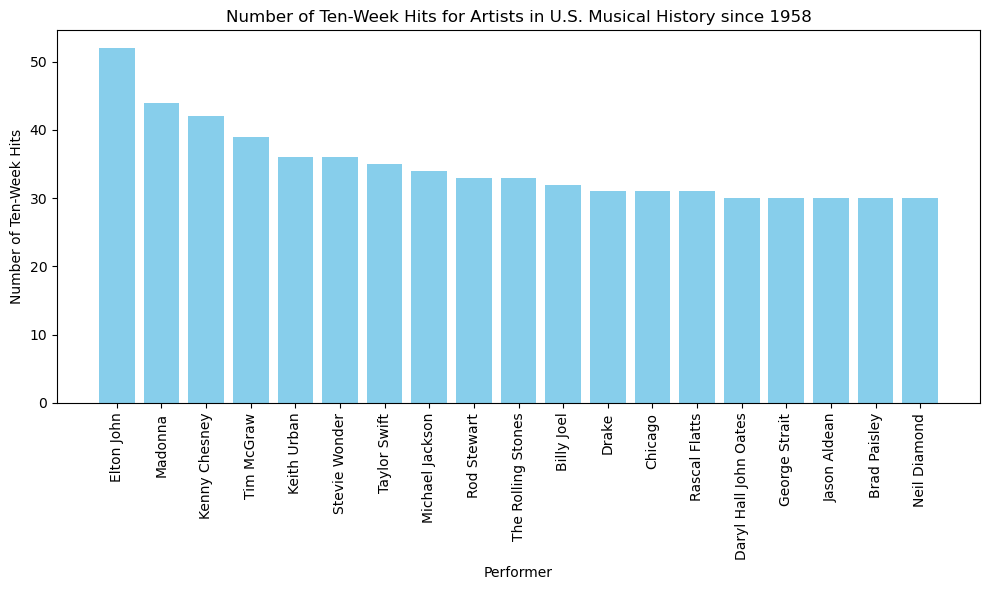

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(df_ten_week_hit_performer_30['performer'], df_ten_week_hit_performer_30['count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Performer')
plt.ylabel('Number of Ten-Week Hits')
plt.title('Number of Ten-Week Hits for Artists in U.S. Musical History since 1958')
plt.tight_layout()
plt.show()